# Линейная регрессия


Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_i$ - i-ый признак объекта $x$, $w_i$ - вес $i$-го признака, $b$ - bias (смещение, свободный член).

В задаче линейной регрессии $\hat{y}$ - это действительное число.

Часто для упрощения записи вводят дополнительный фиктивный признак $x_0$, который всегда равен 1, тогда bias - вес этого признака. В этом случае формула может быть записана как скалярное произведение:
$$ \hat{y} = <w, x> $$

В матричной форме формулу можно переписать следующим образом:
$$ \hat{y} = Xw,$$
$\hat{y}$ - вектор значений целевой переменной размера $n$, $X$ - матрица значений признаков объектов размера $n \times k$, w - вектор весов размера $k$. То есть в наших данных имеется $n$ объектов, каждый их которых описан $k$ признаками.

Таким образом, в матричной форме модель задаётся следующим образом:
$$ y = Xw + \epsilon$$

Важно отметить, что параметрами этой модели являются веса $w$. Когда говорят об обучении какого-либо алгоритма машинного обучения, как правило, имеют в виду настройку весов, т.е. параметров модели.  

На практике $\hat{y} $ может отличается от реальных значений, которые принимает целевая переменная $y$. Разницу между реальным значением и предсказанным, обозначим как $\epsilon$ - вектор значений случайной переменной, соответствующая случайной, непрогнозируемой ошибке модели. Ограничения, которые накладываются на эту модель:
* математическое ожидание случайных ошибок $\epsilon$ равно нулю,
* дисперсия случайных ошибок одинакова и конечна,
* случайные ошибки не скоррелированы.

Один из способов вычислить значения параметров модели, давно знаком - это наименьших квадратов, который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью. Решение по методу наименьших квадратов дает:
$$ w = (X^TX)^{-1}X^TY $$

Загрузим необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках.

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

## Задание 3.1

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [ ]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, X_train, y_train, X_test, y_test

X, X_train, y_train, X_test, y_test = generate_data(100)

Generated 50 train samples and 50 test samples


In [ ]:
### Реализуйте настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE. Сравните с результатами из sklearn

In [ ]:
def MSE(true, pred):
    return np.mean((true - pred)**2)

def MAE(true, pred):
    return np.mean(np.abs(true - pred))

def least_squares(x_mas, y_mas):
  x = np.concatenate((x_mas, np.ones((x_mas.shape[0],1))), axis=1)
  res = np.linalg.inv(x.T.dot(x)).dot(x.T.dot(y_mas))
  return res[-1], res[:1]

b, w = least_squares(X_train, y_train)
print("w:", w[0])
print("b:", b)
print("MSE:", MSE(y_train,  X_train.reshape(-1, 1).dot(w[0]) + b))
print("MAE:", MAE(y_train,  X_train.reshape(-1, 1).dot(w[0]) + b))

Model = LinearRegression()
Model.fit(X_train, y_train)
sklearn_MSE = mean_squared_error(y_train, Model.predict(X_train))
sklearn_MAE = mean_absolute_error(y_train, Model.predict(X_train))
sklearn_w = Model.coef_[0]
sklearn_b = Model.intercept_
print("sklearn w:", sklearn_w)
print("sklearn b:", sklearn_b)
print("sklearn MSE:", sklearn_MSE)
print("sklearn MAE:", sklearn_MAE)

w: 9.450265020280932
b: -7.668656484196394
MSE: 1609.2607479870662
MAE: 32.74914511978808
sklearn w: 9.450265020280932
sklearn b: -7.668656484196395
sklearn MSE: 91.18800115912416
sklearn MAE: 7.657376277174163


## Задание 3.2

Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будм брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

In [ ]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)

In [ ]:
### попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE

Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак:
$$ \widehat{y} = w_1 x_1 + w_2 x_1^2 + ... + w_k x_1^k + b,$$

w: -0.261525700839793
b: 1.8036973848471975
MSE: 0.7625056956254425
MAE: 0.7149451437531338


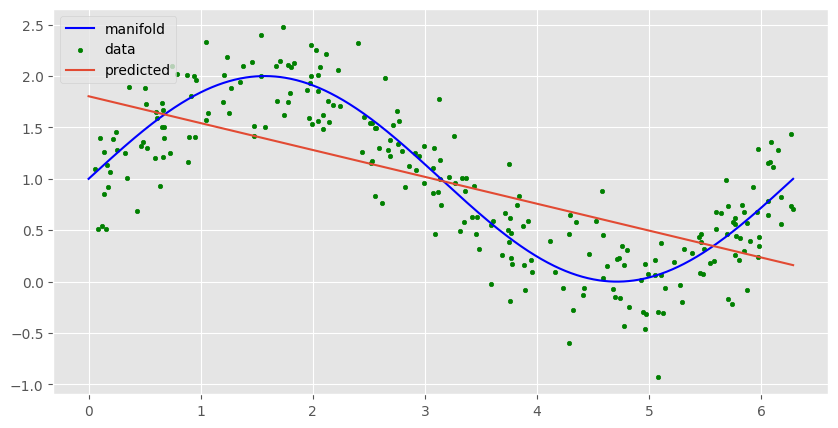

In [ ]:
x2 = data['x_train'].reshape(-1, 1)
y2 = data['y_train'].reshape(-1, 1)
b2, w2 = least_squares(x2, y2)
print('w:', w2[0][0])
print('b:', b2[0])
print('MSE:', MSE(y2,  x2.dot(w2[0]) + b2))
print('MAE:', MAE(y2,  x2.dot(w2[0]) + b2))

plt.figure(figsize=(10, 5))
plt.plot(data['support'], data['values'], 'b', label='manifold')
plt.scatter(data['x_train'], data['y_train'],10, 'g', 'o', label='data')
plt.plot(data['support'], data['support'].reshape(-1, 1).dot(w2) + b2, label='predicted')
plt.legend(loc='upper left')
plt.show()

## Задание 3.3

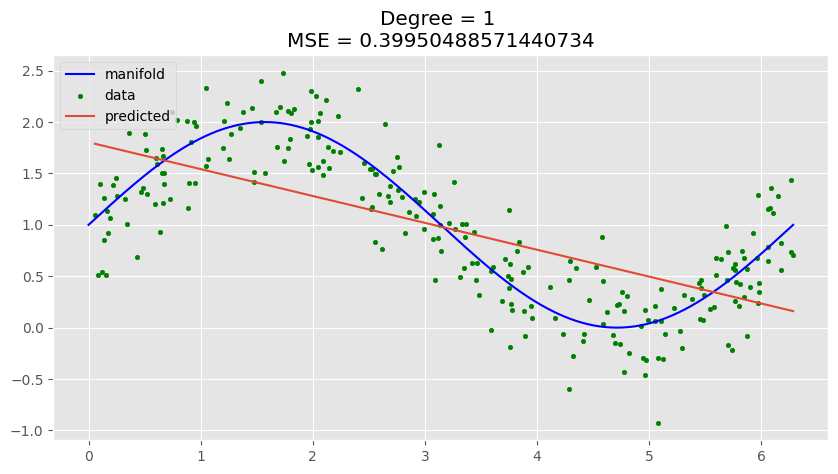

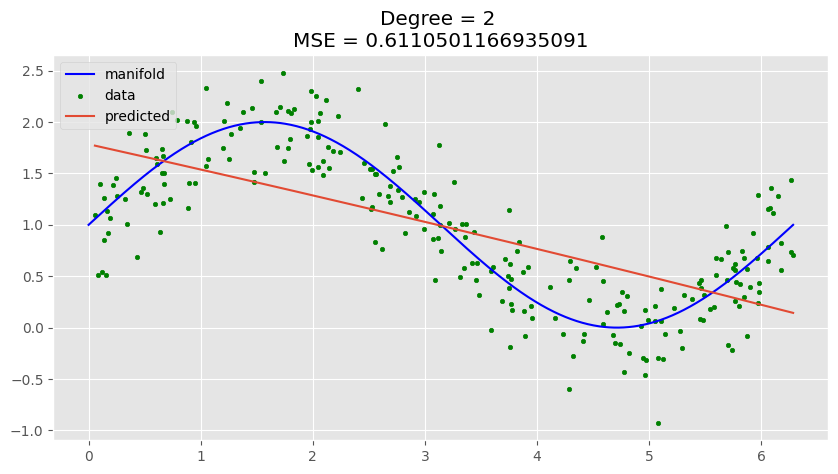

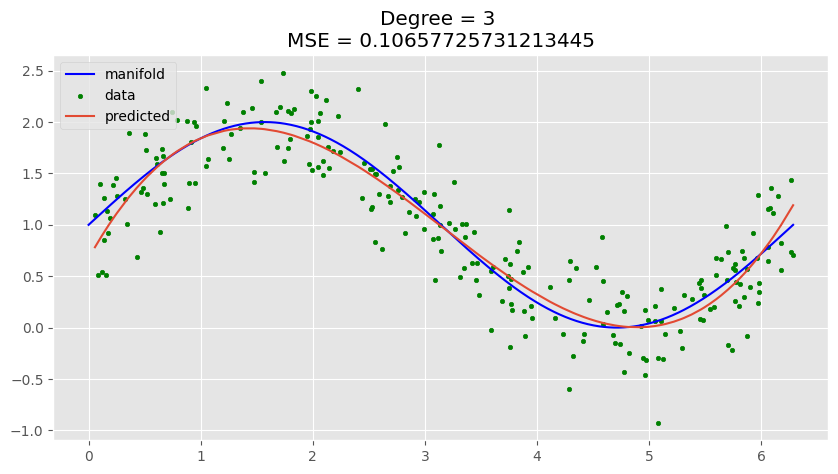

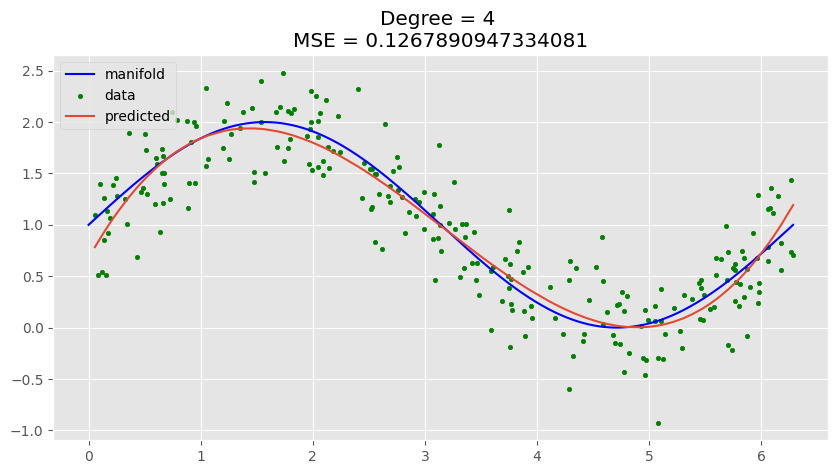

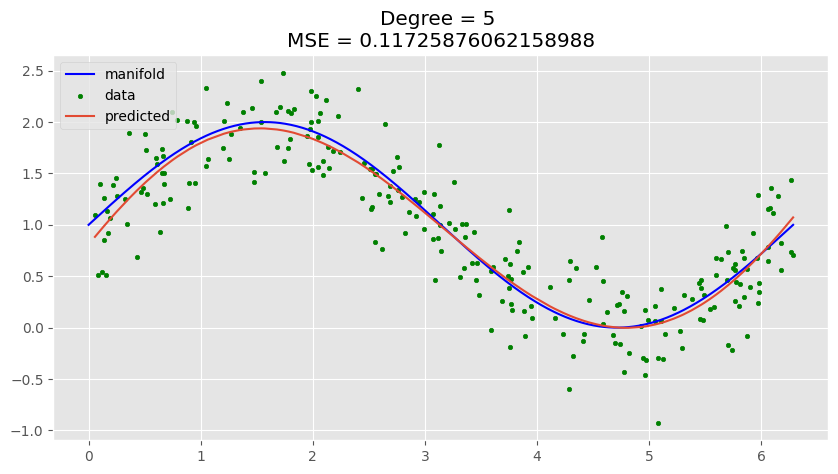

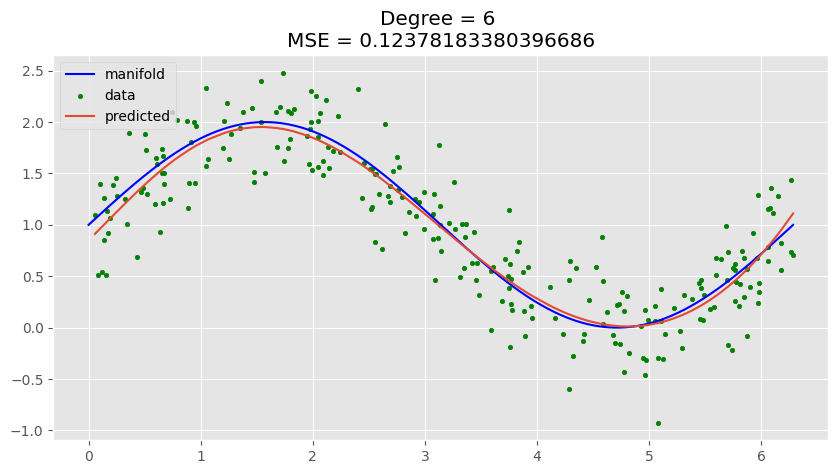

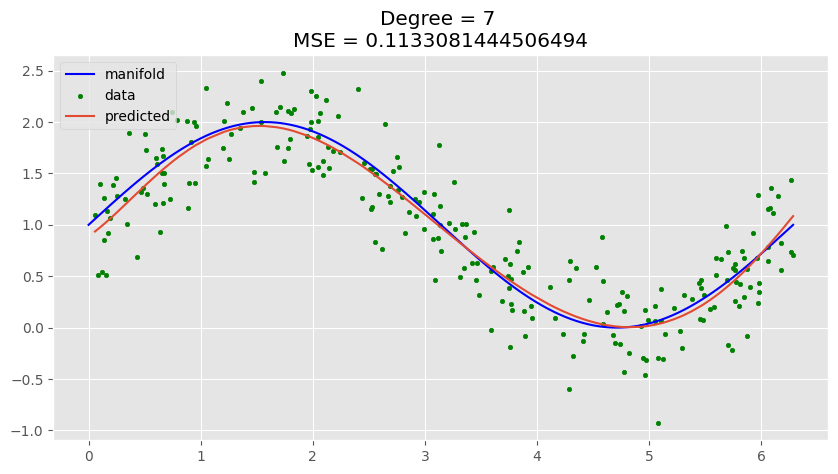

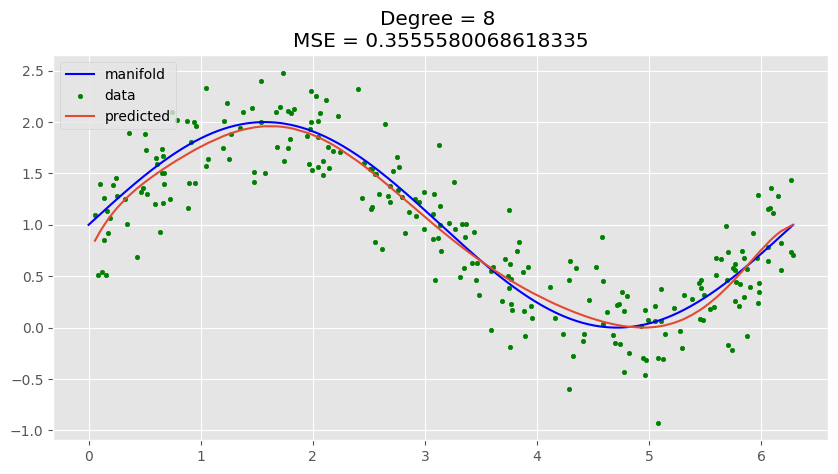

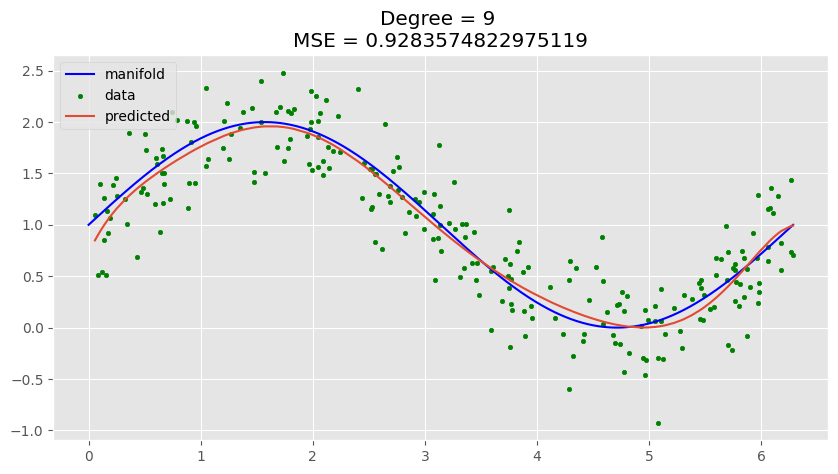

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
### Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней.
### Полином какой степени подходит больше других? Почему?

def plot(i):
  plt.figure(figsize=(10, 5))
  plt.plot(data['support'], data['values'], 'b', label='manifold')
  plt.scatter(data['x_train'], data['y_train'], 10, 'g', 'o', label='data')
  polynom_regression = Pipeline([('polynomial_features', PolynomialFeatures(degree=i)),('linear_regression', LinearRegression())])
  polynom_regression.fit(data['x_train'].reshape(-1, 1), data['y_train'])
  plt.plot(data['x_train'], polynom_regression.predict(data['x_train'].reshape(-1, 1)), label='predicted')
  plt.legend(loc='upper left')
  scores = cross_val_score(polynom_regression, data['x_train'].reshape(-1, 1), data['y_train'], scoring="neg_mean_squared_error", cv=10)
  plt.title('Degree = {} \nMSE = {}'.format(i, -scores.mean()))
  plt.show()

for i in range(1, 10):
   plot(i)

# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

In [ ]:
boston_data  = pd.read_csv("/content/sample_data/housing.csv", sep=",")
house_data_frame = pd.DataFrame(data=boston_data)
house_data_frame.info()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Возьмите датасет отсюда: https://www.kaggle.com/datasets/vikrishnan/boston-house-prices/

## Задание 3.4

In [ ]:
### оставьте в наборе данных только 7 наиболее значимых признаков
### настройте параметры линейной регрессии и сравните метрики качества (MSE и MAE) для полного датасета и усечённого

value_boston = boston_data['MEDV']
points_boston = boston_data.drop(columns=['MEDV'])

X_train, X_test, y_train, y_test = train_test_split(points_boston, value_boston, train_size=0.6, random_state=1)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
lr = LinearRegression().fit(X_train, y_train)
y_test_predicted_full = lr.predict(X_test)
y_train_predicted_full = lr.predict(X_train)

print('full train error MAE:', mean_absolute_error(y_train, y_train_predicted_full), 'Error MSE:', mean_squared_error(y_train, y_train_predicted_full))
print('full test error MAE:', mean_absolute_error(y_test, y_test_predicted_full), 'Error MSE:', mean_squared_error(y_test, y_test_predicted_full))

full train error MAE: 3.107959879049091 Error MSE: 20.2613322196912
full test error MAE: 3.437462890986449 Error MSE: 26.1357953166654


In [ ]:
points_boston = boston_data.drop(columns=['MEDV'])
value_boston = boston_data['MEDV']

lr = LinearRegression()
selector = RFE(lr, n_features_to_select=7).fit(points_boston, value_boston)
selected_points = selector.transform(points_boston)

X_train, X_test, y_train, y_test = train_test_split(selected_points, value_boston, train_size=0.6, random_state=1)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

selected_lr = LinearRegression().fit(X_train, y_train)

selected_y_train = selected_lr.predict(X_train)
selected_y_test = selected_lr.predict(X_test)

print('Train error MAE:', mean_absolute_error(y_train, selected_y_train), 'Error MSE:', mean_squared_error(y_train, selected_y_train))
print('Test error MAE:', mean_absolute_error(y_test, selected_y_test), 'Error MSE:', mean_squared_error(y_test, selected_y_test))

Train error MAE: 3.2855544310416485 Error MSE: 22.252693910733555
Test error MAE: 3.6396670777809828 Error MSE: 27.77673661653856
